## Import + Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [3]:
#all columns linked to geo-demographic
train.columns[13:82]
geo_demo_list = train.columns[13:82].tolist()
geo_demo_list

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [4]:
df_hosp = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/us_hospital_locations.csv")
df_phys = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/National_Downloadable_File_2018.csv")

## Data Pre-processing

In [5]:
# Filter dataframe to include only rows where STATUS is 'OPEN'
df_open = df_hosp[df_hosp['STATUS'] == 'OPEN']

# Extract the first 3 digits of ZIP
df_open['patient_zip3'] = df_open['ZIP'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of hospitals in each group
hospital_counts_by_zip3 = df_open.groupby('patient_zip3').size().reset_index(name='Hospital_Count')

hospital_counts_by_zip3

,patient_zip3,Hospital_Count
0,100,26
1,103,5
2,104,15
3,105,13
4,106,6
...,...,...
821,995,14
822,996,6
823,997,6
824,998,4


In [6]:
# Filter dataframe to include only rows where pri_spec contains 'oncology'
df_oncology = df_phys[df_phys[' pri_spec'].str.contains('oncology', case=False, na=False)]

# Extract the first 3 digits of ZIP
df_oncology['patient_zip3'] = df_oncology[' zip'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of physicians in each group
physician_counts_by_zip3 = df_oncology.groupby('patient_zip3').size().reset_index(name='Physician_Count')

physician_counts_by_zip3

,patient_zip3,Physician_Count
0,006,16
1,007,11
2,008,1
3,009,14
4,010,2
...,...,...
854,995,71
855,996,18
856,997,6
857,998,4


In [7]:
# Convert 'ZIP_3' column to integers in physician_counts_by_zip3 DataFrame
physician_counts_by_zip3['patient_zip3'] = physician_counts_by_zip3['patient_zip3'].astype(int)

# Convert 'ZIP_3' column to integers in hospital_counts_by_zip3 DataFrame
hospital_counts_by_zip3['patient_zip3'] = hospital_counts_by_zip3['patient_zip3'].astype(int)

In [8]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')

# Merge physician_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [9]:
train['Hospital_Count'] = train['Hospital_Count'].fillna(0)
train['Physician_Count'] = train['Physician_Count'].fillna(0)

In [10]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')
# physician_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [11]:
test['Hospital_Count'] = test['Hospital_Count'].fillna(0)
test['Physician_Count'] = test['Physician_Count'].fillna(0)

In [12]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [13]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


## Feature Engineering

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 85 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [15]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [16]:
categorical_cols

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [17]:
numerical_cols

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
     

### ICD-9 to ICD-10 Mapping

In [18]:
train.breast_cancer_diagnosis_code.unique()

array(['C50919', 'C50411', 'C50112', 'C50212', '1749', 'C50912', 'C50512',
       '1744', 'C50412', 'C50812', 'C50911', 'C50312', 'C50311', 'C50111',
       '1741', 'C5091', 'C50811', '1748', 'C50511', '1743', 'C50211',
       'C50011', 'C5051', 'C50012', 'C50419', '1742', 'C50611', 'C50612',
       'C50119', 'C50819', '1746', 'C5041', 'C50619', '19881', 'C5081',
       '1745', 'C50219', 'C50319', 'C50019', 'C50519', 'C50929', 'C50021',
       'C5021', 'C5011', 'C5031', 'C509', 'C50', '1759', 'C5001',
       'C50421'], dtype=object)

In [19]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ICDCodeMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.icd_mapping = {
            '1749': 'C50919', 
            '1744': 'C50419', 
            '1741': 'C50119', 
            '1748': 'C50819', 
            '1743': 'C50319', 
            '1742': 'C50219', 
            '19881': 'C7981', 
            '1759': 'C50929'
        }
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['ICD_code'] = X_copy['breast_cancer_diagnosis_code'].apply(lambda x: 0 if x in self.icd_mapping else 1)
        X_copy['breast_cancer_diagnosis_code'] = X_copy['breast_cancer_diagnosis_code'].apply(lambda x: self.icd_mapping.get(x, x))
        return X_copy

ICDCodeMapper().fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,ICD_code
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.28

### Handle Missing Data

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median', columns=None):
        self.strategy = strategy
        self.columns = columns

    def fit(self, X, y=None):
        if self.strategy == 'median':
            if self.columns is not None:
                self.fill_values = X[self.columns].median()
            else:
                self.fill_values = X.mean()
        elif self.strategy == 'mode':
            if self.columns is not None:
                self.fill_values = X[self.columns].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.columns is not None:
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [22]:
# Initialize the MeanImputer with numerical_cols for mean imputation
median_imputer = MissingDataImputer(strategy='median', columns=numerical_cols)

# Fit and transform the train and test data using the specified numerical columns
df_train_median = median_imputer.fit_transform(train)

df_train_median.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,12906.00,28.43,3.17,14.00,28.19,28.19,28.19,85.00
population,12906.00,20744.32,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.88,2966.20,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [23]:
cols = ['breast_cancer_diagnosis_code',
        'metastatic_cancer_diagnosis_code',
        'patient_zip3',
        'patient_age',
        'payer_type',
        'patient_state',
        'breast_cancer_diagnosis_desc']

## Assembling the pipeline

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [25]:
named_preprocessing_pipeline = Pipeline([
    ('medianimpute', MissingDataImputer(strategy='median', columns=['patient_zip3', 'patient_age'])), 
    ('modeimpute', MissingDataImputer(strategy='mode', columns=['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code','payer_type','patient_state','breast_cancer_diagnosis_desc'])),
    ('ICDMapping', ICDCodeMapper()),
      
    ('prep', ColumnTransformer([
        ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         ['breast_cancer_diagnosis_code',
        'metastatic_cancer_diagnosis_code',
        'patient_zip3',
        'payer_type',
        'patient_state',
        'breast_cancer_diagnosis_desc',
          'ICD_code']
        ),
         ],
        remainder='passthrough').set_output(transform='pandas')),
    ])

named_preprocessing_pipeline  

Pipeline(steps=[('medianimpute',
                 MissingDataImputer(columns=['patient_zip3', 'patient_age'])),
                ('modeimpute',
                 MissingDataImputer(columns=['breast_cancer_diagnosis_code',
                                             'metastatic_cancer_diagnosis_code',
                                             'payer_type', 'patient_state',
                                             'breast_cancer_diagnosis_desc'],
                                    strategy='mode')),
                ('ICDMapping', ICDCodeMapper()),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'patient_zip3', 'payer_type',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc',
                                                   'ICD_code'])]))])

In [26]:
X = train[cols+['DiagPeriodL90D']].drop(columns=['DiagPeriodL90D'], axis=1)
y = train['DiagPeriodL90D']

In [27]:
X.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,breast_cancer_diagnosis_desc
0,C50919,C7989,924,84,MEDICAID,CA,Malignant neoplasm of unsp site of unspecified...
1,C50411,C773,928,62,COMMERCIAL,CA,Malig neoplm of upper-outer quadrant of right ...
2,C50112,C773,760,43,COMMERCIAL,TX,Malignant neoplasm of central portion of left ...
3,C50212,C773,926,45,COMMERCIAL,CA,Malig neoplasm of upper-inner quadrant of left...
4,1749,C773,836,55,COMMERCIAL,ID,"Malignant neoplasm of breast (female), unspeci..."


In [28]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encode__breast_cancer_diagnosis_code      12906 non-null  float64
 1   encode__metastatic_cancer_diagnosis_code  12906 non-null  float64
 2   encode__patient_zip3                      12906 non-null  float64
 3   encode__payer_type                        12906 non-null  float64
 4   encode__patient_state                     12906 non-null  float64
 5   encode__breast_cancer_diagnosis_desc      12906 non-null  float64
 6   encode__ICD_code                          12906 non-null  float64
 7   remainder__patient_age                    12906 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 806.8 KB


In [29]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encode__breast_cancer_diagnosis_code      5792 non-null   float64
 1   encode__metastatic_cancer_diagnosis_code  5792 non-null   float64
 2   encode__patient_zip3                      5792 non-null   float64
 3   encode__payer_type                        5792 non-null   float64
 4   encode__patient_state                     5792 non-null   float64
 5   encode__breast_cancer_diagnosis_desc      5792 non-null   float64
 6   encode__ICD_code                          5792 non-null   float64
 7   remainder__patient_age                    5792 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 362.1 KB


## Modelling

In [30]:
#catboost library
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline

In [31]:
#{'iterations': 543, 'depth': 3, 'l2_leaf_reg': 0.0010906361308849013, 'learning_rate': 0.033854696706707085, 'colsample_bylevel': 0.988672059148904, 'subsample': 0.7524620169083411}

catboost_params_optuna = {'iterations': 543, 'depth': 3, 'l2_leaf_reg': 0.0010906361308849013, 'learning_rate': 0.033854696706707085, 'colsample_bylevel': 0.988672059148904, 'subsample': 0.7524620169083411,
                          'random_seed': 1989,
                          'eval_metric': 'AUC',
                          'verbose': False,
                          'loss_function': 'Logloss',
                          }

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna)


cb_pipeline = make_pipeline(named_preprocessing_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('medianimpute',
                                  MissingDataImputer(columns=['patient_zip3',
                                                              'patient_age'])),
                                 ('modeimpute',
                                  MissingDataImputer(columns=['breast_cancer_diagnosis_code',
                                                              'metastatic_cancer_diagnosis_code',
                                                              'payer_type',
                                                              'patient_state',
                                                              'breast_cancer_diagnosis_desc'],
                                                     strategy='mode')),
                                 ('ICDMapping', ICDCodeMapper()),
                                 ('prep',
                                  Colu...r='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['breast_cancer_diagnosis_code',
                                                                    'metastatic_cancer_diagnosis_code',
                                                                    'patient_zip3',
                                                                    'payer_type',
                                                                    'patient_state',
                                                                    'breast_cancer_diagnosis_desc',
                                                                    'ICD_code'])]))])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7cd76839dd20>)])

In [32]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss

# Number of folds
n_splits = 10

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results_AUC = []
cv_results_F1 = []
cv_results_LL = []


# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    cb_pipeline.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = cb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
    y_pred = cb_pipeline.predict(X_val)
        
    

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    f1 = f1_score(y_val, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
    print('-' * 70)

    # Results
    cv_results_AUC.append(roc_auc)
    cv_results_F1.append(f1)
    cv_results_LL.append(logloss)
    

average_cv_AUC_result = sum(cv_results_AUC) / n_splits
average_cv_F1_result = sum(cv_results_F1) / n_splits
average_cv_LL_result = sum(cv_results_LL) / n_splits



print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_AUC_result}')
print(f'\nAverage F1 across {n_splits} folds: {average_cv_F1_result}')
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_LL_result}')

Fold 1, AUC Score on Validation Set: 0.8179325164360082
Fold 1, F1 Score on Validation Set: 0.7947383469288611
Fold 1, Log Loss Score on Validation Set: 0.46554282885572795
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8153935688521654
Fold 2, F1 Score on Validation Set: 0.7915324863653743
Fold 2, Log Loss Score on Validation Set: 0.47275041904887427
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7937402471157045
Fold 3, F1 Score on Validation Set: 0.8035120297343195
Fold 3, Log Loss Score on Validation Set: 0.46458570833754825
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.8102990458161726
Fold 4, F1 Score on Validation Set: 0.802587163550081
Fold 4, Log Loss Score on Validation Set: 0.45910100059301423
----------------------------------------------------------------------
Fold 5, AUC Score on Vali

## Submission

In [33]:
# Fit the ensemble final model
cb_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = cb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

In [34]:
sample_submission.head(10)

,patient_id,DiagPeriodL90D
0,573710,0.784800
1,593679,0.797563
2,184532,0.789118
3,447383,0.806063
4,687972,0.779441
5,281312,0.113325
6,492714,0.897978
7,378266,0.871424
8,291550,0.775634
9,612272,0.820568


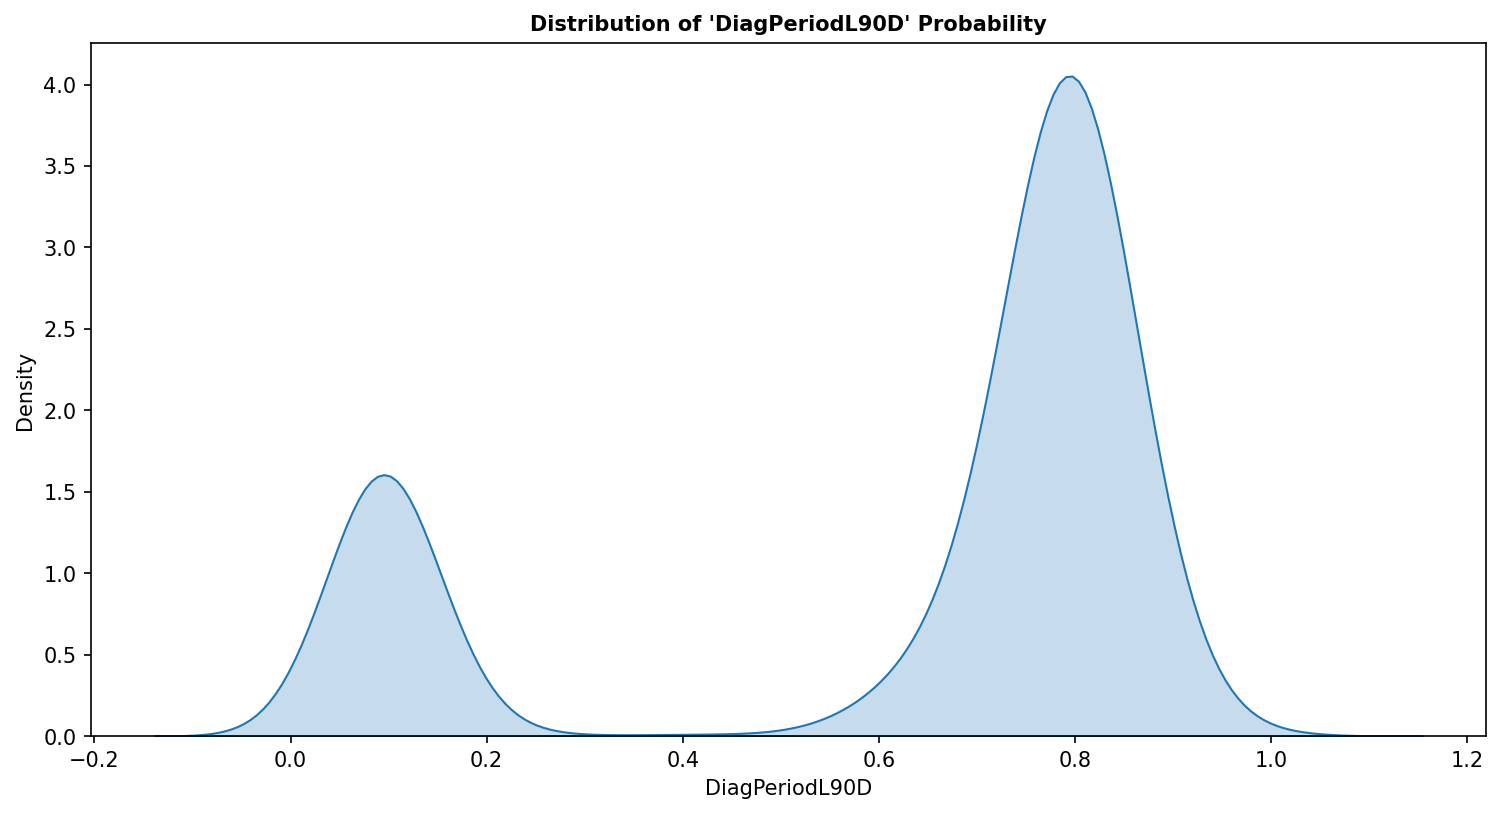

In [35]:
plt.figure(figsize = (12, 6), dpi = 150)
sns.kdeplot(sample_submission.DiagPeriodL90D, fill = True)
plt.title("Distribution of 'DiagPeriodL90D' Probability", weight = 'bold', size = 10)
plt.show()

## Hyperparameter Tuning

In [36]:
# import optuna
# from sklearn.model_selection import  cross_val_score
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# import warnings
# # Set global warning filter
# warnings.filterwarnings("ignore")

In [37]:
# # Suppress FutureWarnings related to is_sparse
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1989)

# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 500, 1000),
#         'depth': trial.suggest_int('depth', 2, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1.0, log=True),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'random_seed': 1989,
#         'eval_metric': 'Logloss',  # Use Logloss metric for optimization
#         'verbose': False,
#         'loss_function': 'Logloss',
#     }
    
#     cb_model = CatBoostClassifier(**params)
#     cb_pipeline = make_pipeline(named_preprocessing_pipeline, cb_model)
    

#     cv = abs(cross_val_score(cb_pipeline, X, y, cv=skf, scoring='neg_log_loss').mean())  # Use neg_log_loss
#     return cv

# study = optuna.create_study(direction='minimize')  # Use minimize for log loss
# study.optimize(objective, n_trials=100)

# best_params_cb = study.best_params
# print("Best Hyperparameters for CatBoost:", best_params_cb)


- Best Hyperparameters for CatBoost: {'iterations': 543, 'depth': 3, 'l2_leaf_reg': 0.0010906361308849013, 'learning_rate': 0.033854696706707085, 'colsample_bylevel': 0.988672059148904, 'subsample': 0.7524620169083411}
- Best is trial 77 with value: 0.46405500300990543.
    